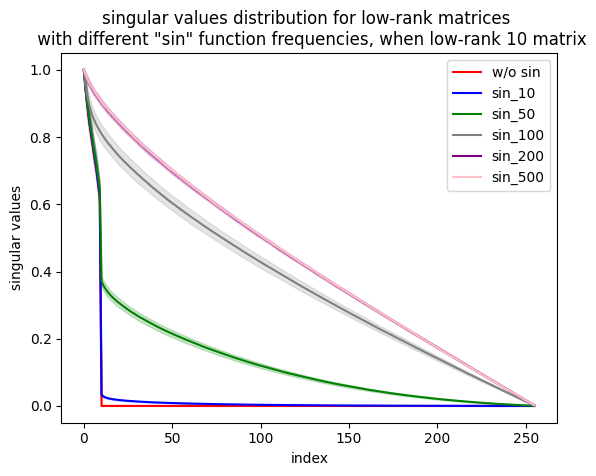

In [152]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import math
import torch.nn as nn

n = 256
k = 10
w1 = 10
w2 = 50
w3 = 100
w4 = 200
w5 = 500
# A = torch.empty(n,k)
# B = torch.empty(k,n)
# nn.init.normal_(A,mean=0,std=0.1)
# nn.init.normal_(B,mean=0,std=0.1)


def sv(A):
    U,S,V=torch.svd(A)
    return S/S.max()

data = torch.empty(100,n)
data_sin1 = torch.empty(100,n)
data_sin2 = torch.empty(100,n)
data_sin3 = torch.empty(100,n)
data_sin4 = torch.empty(100,n)
data_sin5 = torch.empty(100,n)
for i in range(100):
    A = torch.empty(n,k)
    B = torch.empty(k,n)
    nn.init.normal_(A,mean=0,std=0.1)
    nn.init.normal_(B,mean=0,std=0.1)
    data[i] = sv(A@B)
    data_sin1[i] = sv(torch.sin(w1*A@B))
    data_sin2[i] = sv(torch.sin(w2*A@B))
    data_sin3[i] = sv(torch.sin(w3*A@B))
    data_sin4[i] = sv(torch.sin(w4*A@B))
    data_sin5[i] = sv(torch.sin(w5*A@B))
mean = torch.mean(data,axis=0).cpu().detach().numpy()
std = torch.std(data,axis=0).cpu().detach().numpy()
x = np.arange(256)
mean_sin1 = torch.mean(data_sin1,axis=0).cpu().detach().numpy()
std_sin1 = torch.std(data_sin1,axis=0).cpu().detach().numpy()
mean_sin2 = torch.mean(data_sin2,axis=0).cpu().detach().numpy()
std_sin2 = torch.std(data_sin2,axis=0).cpu().detach().numpy()
mean_sin3 = torch.mean(data_sin3,axis=0).cpu().detach().numpy()
std_sin3 = torch.std(data_sin3,axis=0).cpu().detach().numpy()
mean_sin4 = torch.mean(data_sin4,axis=0).cpu().detach().numpy()
std_sin4 = torch.std(data_sin4,axis=0).cpu().detach().numpy()
mean_sin5 = torch.mean(data_sin5,axis=0).cpu().detach().numpy()
std_sin5 = torch.std(data_sin5,axis=0).cpu().detach().numpy()


plt.plot(mean,color = 'red',label = 'w/o sin')
plt.fill_between(x,mean-std,mean+std,color = 'red',alpha = 0.2)

plt.plot(mean_sin1,color = 'blue',label='sin_10')
plt.fill_between(x,mean_sin1-std_sin1,mean_sin1+std_sin1,color = 'blue',alpha = 0.2)

plt.plot(mean_sin2,color = 'green',label='sin_50')
plt.fill_between(x,mean_sin2-std_sin2,mean_sin2+std_sin2,color = 'green',alpha = 0.2)

plt.plot(mean_sin3,color = 'gray',label='sin_100')
plt.fill_between(x,mean_sin3-std_sin3,mean_sin3+std_sin3,color = 'gray',alpha = 0.2)

plt.plot(mean_sin4,color = 'purple',label='sin_200')
plt.fill_between(x,mean_sin4-std_sin4,mean_sin4+std_sin4,color = 'purple',alpha = 0.2)

plt.plot(mean_sin5,color = 'pink',label='sin_500')
plt.fill_between(x,mean_sin5-std_sin5,mean_sin5+std_sin5,color = 'pink',alpha = 0.2)
plt.xlabel('index')
plt.ylabel('singular values')
plt.title('singular values distribution for low-rank matrices \n with different "sin" function frequencies, when low-rank 10 matrix')
plt.legend()


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import math
import torch.nn as nn

n = 256
k = 10
A = torch.empty(n,k)
B = torch.empty(k,n)
nn.init.normal_(A,mean=0,std=0.1)
nn.init.normal_(B,mean=0,std=0.1)
C= torch.empty(n,n)
nn.init.normal_(C,std=0.1)
def sv(A):
    U,S,V=torch.svd(A)
    return torch.sum(S/S.max())



tensor(8.7410)


KeyboardInterrupt: 

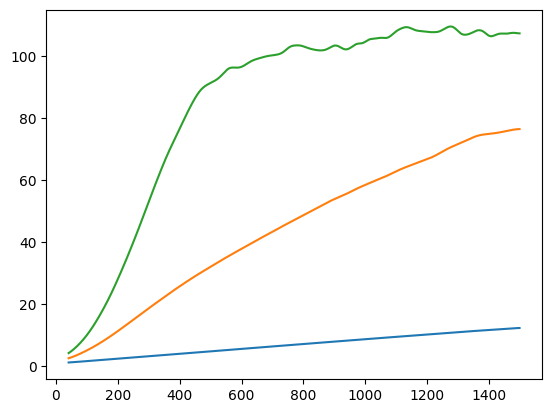

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import math
import torch.nn as nn
from scipy.ndimage import gaussian_filter

def sv(A):
    U,S,V=torch.svd(A)
    return torch.sum(S/S.max())
def moving_average(data, window_size):
    window = np.ones(int(window_size)) / float(window_size)
    return np.convolve(data, window, 'same')
sr1=[]
sr2=[]
for k in [1,2,3,4,6,8,10]:
    A = torch.empty(n,k)
    B = torch.empty(k,n)
    nn.init.normal_(A,mean=0,std=0.1)
    nn.init.normal_(B,mean=0,std=0.1)
    sr = []
    for w in range(1500):
        sr.append(sv(torch.sin(w*A@B)).detach().cpu().numpy())
    sr = gaussian_filter(sr,10)
    plt.plot(sr,label = 'low-rank '+str(k))
plt.xlabel('frequency')
plt.ylabel('stable rank')
plt.grid()
plt.title('stable rank for different low-rank matrices with \n varying "sin" function frequencies')
plt.legend()


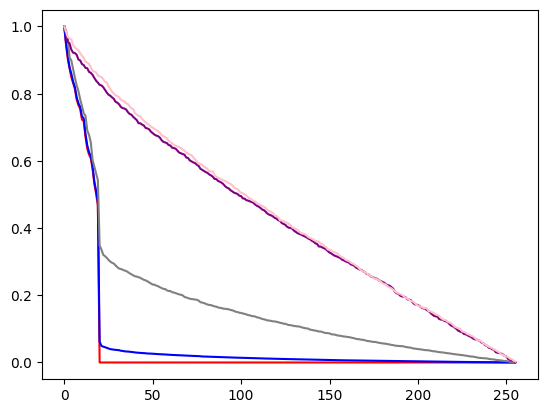

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import math
import torch.nn as nn

n = 256
k = 20
w1 = 10
w2 = 30
w3 = 70
w4 = 100
w5 = 500
A = torch.empty(n,k)
B = torch.empty(k,n)
C = torch.empty(n,n)
nn.init.normal_(A,mean=0,std=0.1)
nn.init.normal_(B,mean=0,std=0.1)
nn.init.normal_(C,mean=0,std=0.1)


def sv(A):
    U,S,V=torch.svd(A)
    return S/S.max()

data = torch.empty(100,n)
data_sin1 = torch.empty(100,n)
data_sin2 = torch.empty(100,n)
data_sin3 = torch.empty(100,n)
data_sin4 = torch.empty(100,n)
data_sin5 = torch.empty(100,n)

A = torch.empty(n,k)
B = torch.empty(k,n)
nn.init.normal_(A,mean=0,std=0.1)
nn.init.normal_(B,mean=0,std=0.1)
data = sv(A@B)
data_sin1 = sv(torch.sin(w1*A@B))
data_sin2 = sv(torch.sin(w2*A@B))
data_sin3 = sv(torch.sin(w3*A@B))
data_sin4 = sv(torch.sin(w4*A@B))
data_full = sv(C)
plt.plot(data,color = 'red',label = 'w/o sin')
plt.plot(data_sin1,color = 'blue',label = 'sin_10')
plt.plot(data_sin2,color = 'gray',label = 'sin_30')
plt.plot(data_sin3,color = 'purple',label = 'sin_70')
plt.plot(data_sin4,color = 'pink',label = 'sin_100')



Text(0.5, 1.0, 'weight matrix spectrum on the second fc layer in the MLP block')

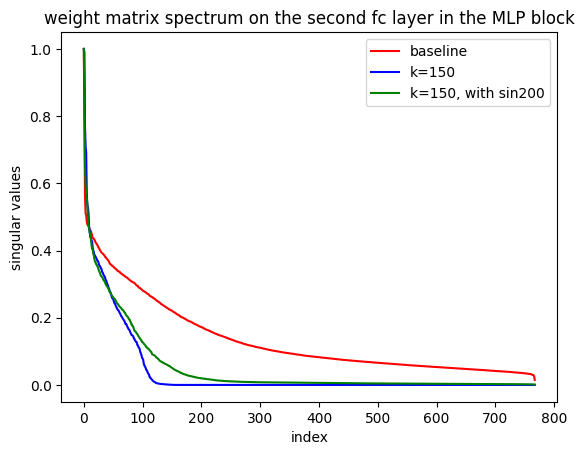

In [20]:
import torch
import matplotlib.pyplot as plt
checkpoint_baseline = torch.load('vit_ckpt/baseline_model_best.pth',map_location=torch.device('cpu'))
checkpoint_k_150 = torch.load('vit_ckpt/lr_4e-4_k_150_best.pth',map_location=torch.device('cpu'))
checkpoint_k_150_sin200 = torch.load('vit_ckpt/lr_4e-4_k_150_sin200.pth',map_location=torch.device('cpu'))

weights = checkpoint_baseline['state_dict']['blocks.0.mlp.fc2.weight']

A_k_150=checkpoint_k_150['state_dict']['blocks.0.mlp.A_2']
B_k_150=checkpoint_k_150['state_dict']['blocks.0.mlp.B_2']

A_k_150_sin200=checkpoint_k_150_sin200['state_dict']['blocks.0.mlp.A_2']
B_k_150_sin200=checkpoint_k_150_sin200['state_dict']['blocks.0.mlp.B_2']
def sv(A):
    U,S,V=torch.svd(A)
    return S/S.max()
data1 = sv(weights)
data2 = sv(A_k_150@B_k_150)
data3 = sv(torch.sin(200*A_k_150_sin200@B_k_150_sin200)/16)
plt.plot(data1,color = 'red',label = 'baseline')
plt.plot(data2,color = 'blue',label = 'k=150')
plt.plot(data3,color = 'green',label = 'k=150, with sin200')

plt.legend()

plt.xlabel('index')
plt.ylabel('singular values')
plt.title('weight matrix spectrum on the second fc layer in the MLP block')

tensor([1.0000e+00, 3.5353e-03, 3.4975e-03, 3.4610e-03, 3.4207e-03, 3.3611e-03,
        3.3492e-03, 3.3311e-03, 3.3185e-03, 3.2695e-03, 3.2439e-03, 3.2323e-03,
        3.2019e-03, 3.1691e-03, 3.1485e-03, 3.1171e-03, 3.0894e-03, 3.0530e-03,
        3.0297e-03, 3.0053e-03, 2.9826e-03, 2.9556e-03, 2.9115e-03, 2.8874e-03,
        2.8652e-03, 2.8433e-03, 2.8381e-03, 2.8054e-03, 2.7850e-03, 2.7584e-03,
        2.7442e-03, 2.7391e-03, 2.7130e-03, 2.7085e-03, 2.6783e-03, 2.6731e-03,
        2.6698e-03, 2.6411e-03, 2.6096e-03, 2.5974e-03, 2.5744e-03, 2.5641e-03,
        2.5319e-03, 2.5227e-03, 2.5037e-03, 2.4853e-03, 2.4743e-03, 2.4389e-03,
        2.4213e-03, 2.4114e-03, 2.3914e-03, 2.3651e-03, 2.3489e-03, 2.3395e-03,
        2.3383e-03, 2.3221e-03, 2.3026e-03, 2.2919e-03, 2.2749e-03, 2.2604e-03,
        2.2442e-03, 2.2217e-03, 2.2164e-03, 2.1819e-03, 2.1772e-03, 2.1747e-03,
        2.1550e-03, 2.1394e-03, 2.1306e-03, 2.1211e-03, 2.1063e-03, 2.0911e-03,
        2.0723e-03, 2.0601e-03, 2.0527e-

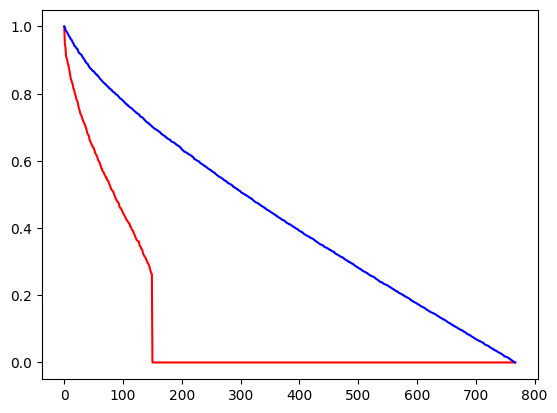

In [38]:
import torch
import torch.nn as nn
def sv(A):
    U,S,V=torch.svd(A)
    return (S/S.max())

a= torch.rand(768,768)
b = torch.rand(768,150)
c=torch.rand(150,768)
print(sv(b@c),sv(torch.sin(5000*(b@c))))
nn.init.normal_(b,mean=0,std=0.1)
nn.init.normal_(c,mean=0,std=0.1)
plt.plot(sv(b@c),color = 'red',label = 'baseline')
plt.plot(sv(torch.sin(1000*(b@c))),color = 'blue',label = 'k=150')


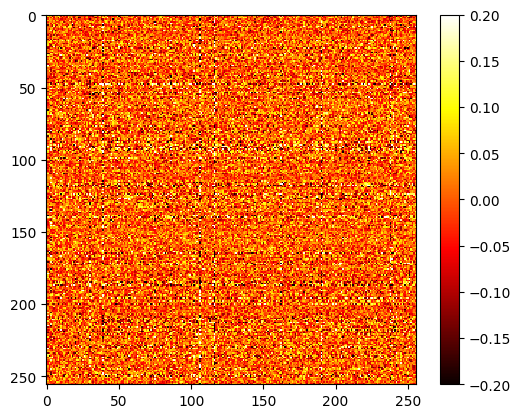

In [10]:
import torch
import matplotlib.pyplot as plt
import numpy as np
model=torch.load('/home/yiping/Downloads/wire/model_params.pth',map_location='cpu')
model.keys()
# # model['model']['decoder.blocks.0.fc_0.weight'].shape

matrix=model['net.3.linear.weight']
matrix = np.clip(matrix, -0.2, 0.2)

plt.imshow(matrix, cmap='hot', interpolation='nearest')
plt.colorbar() 
plt.show()